# COVID-19 Data Analysis

### Anthony Mason

### CMSC 320

## Introduction
I am not the first person that has investigated the statistics surrounding the COVID-19 and I most certainly will not be the last. Nevertheless, it is not necessarily about how much information data scientists try to push out to the public, but rather the quality of the information they present. here I will walk you through the steps to do your own data analysis on COVID-19.

### Objectives
* Introduction to notebook
* Gather recent COVID-19 data
* Visualize data graphically
* Predict COVID-19 statistics

### Introduction
#### Why COVID-19?
This virus has not just caused a concern among society, it has entirely changed our way of life. Whether you are a student, forced to finish out your semester online, or a worker that is facing unemployment, we all are being impacted in our own way. By giving others the ability to do data analysis, we are allowing them to better understand a topic instead of believing whatever is being told on the news.

### Setting up your Jupyter Notebook
1) Install most recent version of Python which can be found [here](https://www.python.org/downloads/) and follow the recommended installation settings.

2) Create a new folder somewhere on your computer where you would like to save your files.

3) If you're on Windows, open your command line. If you're on Mac, open your terminal prompt. From here you will want to enter the following commands which will give you access to the libraries we will use for looking at the data. If you do not want all of these libraries installed directly on your computer, you can create a virtual environment from the instructions [here](https://packaging.python.org/guides/installing-using-pip-and-virtual-environments/), which will allow you to easily delete all the libraries if you so choose.
* pip install jupyterlab
* pip install pandas
* pip install ipyleaflet
* pip install statsmodels
* pip install torch torchvision

4) Travel to the folder you created in step two via the command line/terminal prompt. If you are unfamiliar with how to do this, check out these links for [Windows](https://www.onmsft.com/feature/command-prompt-basics-working-with-files-and-folders) and [Mac](https://swcarpentry.github.io/shell-novice/02-filedir/index.html) that help walk you through the process (look for the 'cd' command explanation).

5) Once in the directory, enter the command 'jupyter notebook' without the quotes. This will open up a Jupyter Notebooks.

6) All that is left to do is go to the top right corner of the screen and click the button that says 'new'.

** Important Note ** : Do not close your command line/terminal prompt while working inside of your Jupyter notebook. It acts as a connection to the kernel on your computer which allows you to run code from within your notebook.

### Grabbing Data
We will be using the data provided by [John Hopkins Center for Systems Science and Engineering](https://github.com/CSSEGISandData). They provide daily updates of COVID-19 statistics across the world which will allow us to attempt predictions on whether the virus is slowing down or not. If you want to look at the data as a whole, you can find the link to each set below. I have gone ahead and created a new repository that has dates up to 5/9/20 for the sake of recreating this experiment. Feel free to redo this experiment again in the coming months as COVID-19 begins to slow down to see how the results compare. For now, we will stick with this subset that is not updated after May 9th.
* [COVID-19-Confirmed-Global](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* [COVID-19-Confirmed-US](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv)
* [COVID-19-Deaths-Global](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)
* [COVID-19-Recoveries-Global](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)

### Loading data into notebook
We will first want to import some of the libraries that we installed previously to be able to look at the data. We will give them shorter names so that using them requires less typing. We will also set each url for our repository here for readability in the next step.

In [1]:
import pandas as pd
from plotnine import *

global_confirmed = 'https://raw.githubusercontent.com/Amason16/Amason16.github.io/master/global_confirmed.csv'
us_confirmed = 'https://raw.githubusercontent.com/Amason16/Amason16.github.io/master/us_confirmed.csv'
global_deaths = 'https://raw.githubusercontent.com/Amason16/Amason16.github.io/master/global_deaths.csv'
global_recovered = 'https://raw.githubusercontent.com/Amason16/Amason16.github.io/master/global_recoveries.csv'

We can use pandas to look at our data in a very nice table format, making it very easy for readability. Lets load the global confirmed cases table.

In [2]:
cases_df = pd.read_csv(global_confirmed)
cases_df.head() # display first 5 rows of table

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


Wow, that is a lot of information to take in. Luckily for us we have the tools to make sense of it. As we can see, each entry in our table corresponds to a province/state from some country. We can see here that there are 111 columns that make up an entry in the table, but thankfully most of those are just dates. We now know that the time range the data was recorded was between January 22 and May 7 (the time of me creating this notebook).

### Data exploration and visualization
#### Total confirmed cases over time
The great thing about notebooks is being able to visualize our data right in front of us. Let's start off simple. We will extract the total number confirmed infections from each day and plot them against each other. This will give us a rough idea of how the virus has developed over the time period we are evaluating.

In [3]:
sum_cases = [] # list of summed confirmed cases
dates = cases_df.columns.tolist()[4:] # list of dates recorded

for date in dates:
    sum_cases.append(cases_df[date].sum())

In [4]:
sum_cases_df = pd.DataFrame({'date' : dates, 'conf_cases' : sum_cases})
sum_cases_df['date'] = sum_cases_df['date'].astype('datetime64[ns]').dt.date

 We need the datetime library to make some labels. We also want to mask a harmless warning that ggplot will display depending on your version of plotnine.

In [5]:
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

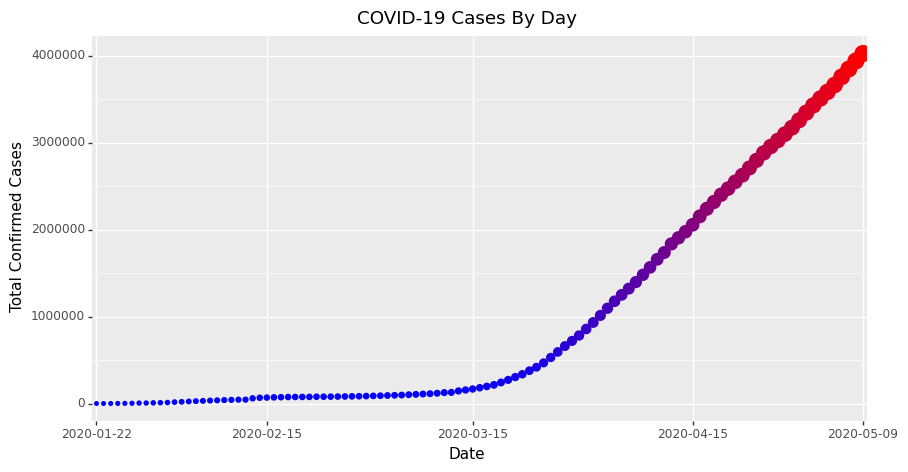

<ggplot: (-9223371928635360832)>

In [6]:
x_labels = ['2020-01-22', '2020-02-15', '2020-03-15', '2020-04-15', '2020-05-09']
x_labels = [dt.datetime.strptime(label, '%Y-%m-%d').date() for label in x_labels]

(ggplot(sum_cases_df, aes(x='factor(date)', y='conf_cases', size='conf_cases')) +
        geom_point(aes(color='conf_cases'), show_legend=False) +
        labs(x='Date', y='Total Confirmed Cases', title='COVID-19 Cases By Day') +
        scale_color_gradient(low='blue', high='red') +
        scale_x_discrete(breaks=x_labels, labels=x_labels) +
        theme(figure_size=(10, 5)))

Now we can actually visualize what is happening with our data over time instead of reading through our huge table of reports. From this we can see that there was a very steady increase until around March, where the confirmed cases began to explode. This could simply have come from the fact that many people were not tested until this point. It is graphs like this that many people will attempt to misinform readers by presenting data that does not tell the whole story. Keep this in mind as you do your own experiments and start thinking logically about what your data is showing.

#### Cases by country
This time we will do something a little different, we will compare the confirmed cases across all countries based on two seperate dates. This could give us an idea of which countries appear to have the highest amount of confirmed cases and allow us to see how the virus spread over time. We will compare the confirmed cases from 60 days into the dataset against the most recent day recorded. Feel free to try comparing different days by changing the values of '60' and '-1' below. I chose to not use the earlier days of the datset because if you do, you will see that there are nearly no confirmed cases in any country other than China.

In [7]:
date1, date2 = dates[60], dates[-1] # grab first and last dates in dataframe
country_df = cases_df.groupby(['Country/Region']).sum() # sum all cases across country/region

plot1 = country_df.loc[:, date1].nlargest(20) # grab 20 largest counts
plot1 = plot1.to_frame().reset_index().rename(columns={date1 : 'cases'}) # organize

plot2 = country_df.loc[:, date2].nlargest(20)
plot2 = plot2.to_frame().reset_index().rename(columns={date2 : 'cases'})

We now have the top 20 countries. We will organize them to make our plot more presentable

In [8]:
plot1_labels = [(row[1], row[0]) for _, row in plot1.iterrows()]
plot1_labels = sorted(plot1_labels)
plot1_labels = [country for (cases, country) in plot1_labels]

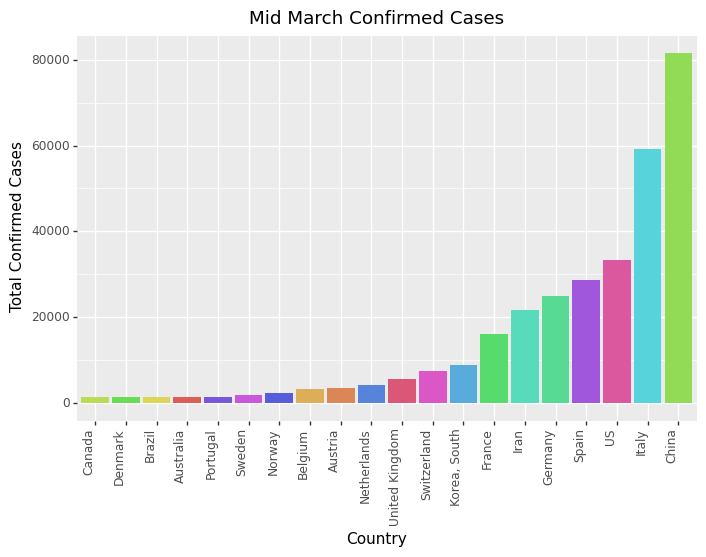

<ggplot: (-9223371928632927236)>

In [9]:
(ggplot(plot1, aes(x='Country/Region', y='cases')) +
        geom_bar(aes(fill='Country/Region'), stat='identity', show_legend=False) +
        labs(x='Country', y='Total Confirmed Cases', title='Mid March Confirmed Cases') +
        scale_x_discrete(limits=plot1_labels) +
        theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(8,5)))

At this point, we are 60 days into the spread of COVID-19. We can see that China still sits at the top of the confirmed case count with Italy quickly catching up. It is very cloase between many of the top countries with the counts beginning to taper off around South Korea. Let's skip ahead to the most recently recorded day in the dataset and see that has changed.

In [10]:
plot2_labels = [(row[1], row[0]) for _, row in plot2.iterrows()]
plot2_labels = sorted(plot2_labels)
plot2_labels = [country for (cases, country) in plot2_labels]

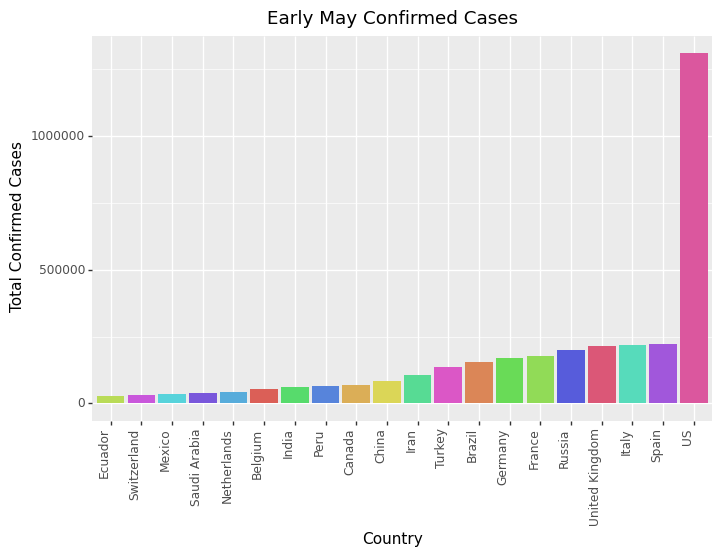

<ggplot: (-9223371928633119728)>

In [11]:
(ggplot(plot2, aes(x='Country/Region', y='cases')) +
        geom_bar(aes(fill='Country/Region'), stat='identity', show_legend=False) +
        labs(x='Country', y='Total Confirmed Cases', title='Early May Confirmed Cases') +
        scale_x_discrete(limits=plot2_labels) +
        theme(axis_text_x=element_text(angle=90, hjust=1), figure_size=(8,5)))

Well that escalated quickly. As we can see, compared to other countries, China does not stand out as much. The United states has taken over with the highest confirmed case count by a long shot. As previously mentioned, we must be careful when both evaluating and presenting this data. This is simply the number of confirmed cases that have been reported to some sort of medical expert. It is very possible that there are many cases of COVID-19 that have not gone reported that would affect this graph. We have to consider the idea of some countries not having access to nearly as many testing kits as other countries. This could explain why we see much larger counts in first world countries. It is also important to notice the difference in scale of our two graphs y-axis. With that in mind, we can see that though China may appear to be in much better shape, they are in fact not much different than the previous graph. This is how data can create an illusion that the provider is attempting to mislead their audience. I am not trying to do that, instead I want you to notice it to be better prepared.

Here is a quick comparison of China's confirmed cases between the two graphs

In [12]:
print('China from first graph:', plot1[plot1['Country/Region'] == 'China'].iloc[0,1])
print('China from second graph:', plot2[plot2['Country/Region'] == 'China'].iloc[0,1])

China from first graph: 81435
China from second graph: 83990


#### Map of United States
This is great and all, but let's take a look at another dataset that we downloaded previously. The confirmed cases located only in the United States. We will use this other dataset instead of extracting the US column from the global table so that we can look at individual states.

In [13]:
cases_us_df = pd.read_csv(us_confirmed) # US cases
coords = [] # list for coordinates

In [14]:
# accumulate all cases in United States
for index, row in cases_us_df.iterrows():
    lat, lg, cases  = row[8], row[9], row[-1]
    if cases != 0:
        coords += cases * [(lat, lg)]

In [15]:
from ipyleaflet import Map, Heatmap # package to generate heat map

united_states = (37.0902, -95.7129)

us_map = Map(center=united_states, zoom=4) # create a map to view
heat_map = Heatmap(locations=coords, radius=20) # create heat layer
us_map.add_layer(heat_map) # apply heat layer to map

In [16]:
us_map

Map(center=[37.0902, -95.7129], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

This heat map shows us where the highest rates of confirmed cases are around the US. We can see that the bulk of cases reported are in major cities such as New York, Texas, California, Washington, and more. Heatmaps are great because we can see exactly where the hotspots are for confirmed cases as well as areas that do not appear to have as much activity.

#### Linear model relationship
Most people would believe the higher confirmed cases of COVID-19, the higher the death toll. We want to check this assumption for ourselves to make sure that there is an actual relationship between confirmed cases and deaths. We will attempt to apply a linear model with a relationship between confirmed cases and deaths.

In [17]:
deaths_df = pd.read_csv(global_deaths) # worldwide COVID-19 deaths
# deaths_df.head()

We will use daily cases/deaths between all countries to see if there is a relationship. Some countries in the confirmed cases table are not listed in the deaths table because there have not been any confirmed deaths in that country/region. we already have all the confirmed cases summed up from earlier so let's sum up our deaths now.

In [18]:
sum_deaths = [] # list of summed deaths

for date in dates:
    sum_deaths.append(deaths_df[date].sum())

In [19]:
relationship_df = pd.DataFrame({'date' : dates, 'cases' : sum_cases, 'deaths' : sum_deaths})
relationship_df.head()

,date,cases,deaths
0,1/22/20,555,17
1,1/23/20,654,18
2,1/24/20,941,26
3,1/25/20,1434,42
4,1/26/20,2118,56


We can make an assumption that there is a relationship already just by looking at the first five rows in the table above. Let's make sure though!

In [20]:
from statsmodels.formula.api import ols

# fit linear model to deaths dependant on number of cases
model = ols(formula='deaths~cases', data=relationship_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.511e+04
Date:                Sun, 10 May 2020   Prob (F-statistic):          1.60e-136
Time:                        12:47:22   Log-Likelihood:                -1080.9
No. Observations:                 109   AIC:                             2166.
Df Residuals:                     107   BIC:                             2171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5088.8587    603.157     -8.437      0.000   -6284.548   -3893.169
cases          0.0714      0.000    187.386      0.000       0.071       0.072
==============================================================================
Omnibus:                       17.537   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.480
Skew:                          -1.085   Prob(JB):                     2.17e-05
Kurtosis:                       3.133   Cond. No.                     2.02e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This table may look daunting, but it puts information in a nice format for us to interpret. Looking at the fifth line from the bottom where it says 'cases', since we plotted deaths dependent on cases, this tells us that for every confirmed case of COVID-19, the number of deaths increases by 0.0714. This may seem small but remember our previous graphs that showed the confirmed cases count increasing into the millions. By using these two datasets together, we can see that 0.0714 can actually reflect a large death count worldwide. If you ever choose to do linear regresion yourself, be sure to keep an eye on the p-value associated with this number under the P>|t| column. This tells us the significance of the statistic. For more information on p-values, check out this [link](https://www.investopedia.com/terms/p/p-value.asp).

### Predictions with machine learning
So, I am sure that up to this point you can see that there is a relationship between time passed and cases/deaths involving COVID-19. This is why it has become such a big deal to the point of shutting down society as we know it. So, what if we wanted to predict how the situation would be tomorrow? Instead of guessing, we can actually use statistical analysis through machine learning to design a model that will use the data we have to make an informed prediction.

#### Recovery dataset
We will build a model that will predict what the number of recovery cases are for the last day in the dataset. The model will make this prediction based on the total number of confirmed cases that day. You may be thinking that the number of confirmed cases on a day does not directly reflect the number of recoveries that day, but more so a few weeks away when they will have recovered from the virus. The great thing about these prediction models is that they can use the entire dataset to make an informed decision based on the input you give it. By providing the model with how many confirmed cases there are, the model can predict based on previous knowledge how many people should have recovered at this point.

#### Clean the two datasets
First we will grab the recoveries dataset and reset the tables.

In [21]:
recovery_df = pd.read_csv(global_recovered) # worldwide COVID-19 recoveries
recovery_df = recovery_df.groupby(['Country/Region']).sum().reset_index()
country_df = country_df.reset_index()

Next we need to only use countries that are shared between the two tables. It is possible that a country has confirmed cases but does not have any recoveries. It is important when creating these models that we feed it accurate and consistent information.

In [22]:
# c used to signify country
cases_c = country_df['Country/Region'].tolist() 
recovery_c = recovery_df['Country/Region'].tolist()
shared_c = [country for country in cases_c if country in recovery_c]

In [23]:
clean_cases_df = country_df[country_df['Country/Region'].isin(shared_c)]
clean_cases_df = clean_cases_df.drop(columns=['Country/Region', 'Lat', 'Long'])

clean_recovery_df = recovery_df[recovery_df['Country/Region'].isin(shared_c)]
clean_recovery_df = clean_recovery_df.drop(columns=['Country/Region', 'Lat', 'Long']).sum()
clean_recovery_df = clean_recovery_df.to_frame().rename(columns={0 : 'count'})

Okay, now we have our two tables that we wanted: all of the confirmed cases by country over time, and the total number of recoveries by country over time. Let's take a look.

In [24]:
clean_cases_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,0,0,0,0,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,0,0,0,0,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,0,0,0,0,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,0,0,0,0,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,0,0,0,0,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [25]:
clean_recovery_df.head()

,count
1/22/20,28
1/23/20,30
1/24/20,36
1/25/20,39
1/26/20,52


#### Labeling data
Earlier I said what information we would give to the model, so now we need to get that information by extracting it from our tables. We will divide all of our values by 1e07 (10 million) in order to keep all values below 1. This is important because many values in this dataset are in the hundreds of thousands and even millions. With the multiplication that our model will be performing, these numbers could quickly grow too large for our computer to be able to represent. This would result in either getting 0 or nan which stands for 'not a number'. The model would then become useless so we want to avoid that.

In [26]:
model_data = clean_cases_df.iloc[:,:].to_numpy() / 1e07

In [27]:
model_labels = clean_recovery_df.iloc[:,0].to_numpy() / 1e07
model_labels = model_labels.reshape(model_labels.shape[0], 1)

#### Conversion of data
There are many choices out there when designing a machine learning model. We are going to have some fun with it and make a very simple neural network. At a high level, a neural network is currently the closest thing that computer scientists have come to recreating the functionality of a human brain. For this task we will use an awesome library called pytorch. Pytorch is a great framework which makes creating a neural network very simple and intuitive, even for a first timer.

I will not go into great detail about neural networks in this journal but the high level idea is that we will send the values from our dataset into the neural network, it will make a prediction based on these values, and we will tell it how wrong it was. From there the model will be adjusted to try to make a better guess next time. We do this for as long as we would like until we believe the model is performing well. There is MUCH more that goes on under the hood, but we will not get into that. If you are interested in learning more about neural networks, check out this [link](https://pathmind.com/wiki/neural-network).

In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F

We will convert the table values we have into tensors. Tensors are used to efficiently work with data in pytorch. Think of them as vectors or matrices from your linear algebra class.

In [29]:
x_train = torch.FloatTensor(model_data[:,:-1]).T
y_train = torch.FloatTensor(model_labels[:-1, 0])
x_test = torch.FloatTensor(model_data[:,-1])
y_test = torch.FloatTensor(model_labels[-1])

print('Train Data Shape:', x_train.shape)
print('Train Label Shape:', y_train.shape)
print('Test Data Shape:', x_test.shape)
print('Test Label Shape:', y_test.shape)

Train Data Shape: torch.Size([108, 187])
Train Label Shape: torch.Size([108])
Test Data Shape: torch.Size([187])
Test Label Shape: torch.Size([1])


So we see that we have 187 countries to account for and we will be using all but one day to train with.

##### The Network
Now that we are done with the boring data preparation, let's get into the meat of the learning. Here we will be creating the actual networks architecture. If you are interested in knowing all of the details of the architecture, check out that link I posted previously. Otherwise, all you need to know is that we have layers of what we call 'neurons' that we will pass our data through. Along this path, the values are multiplied by other values that we call 'weights' which will shrink the size of the data down as we move through the network. You may be wondering why we are doing this. Remember, we are predicting a single output: the estimated number of recoveries on a given day. So, we need to squish all of our countries down into a single output value. There is also what we call an 'activation function' performed after each of these operations to help control the data passed through. Once again, we will not go into much detail but just know that we are using Relu (Rectified Linear Unit). This is a function that flattens any numbers less than or equal to zero to zero.

In [30]:
class Net(nn.Module):
    def __init__(self, dims):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(dims[0], dims[1])
        self.fc2 = nn.Linear(dims[1], dims[2])
        self.fc3 = nn.Linear(dims[2], dims[3])
        self.fc4 = nn.Linear(dims[3], dims[4])
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x

#### Hyperparameters
Up until now we have basically waived our hands over how a neural network works. Simply put, it is all math. When we create our network, we initially have a bunch of random 'weights' to multiply by. Based on how close our final output is to the actual value we want (real number of recoveries), we will adjust these weights. This is done through a procedure called back propagation. If you want to read up on this, check out [this](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/) great explanation. If not, we are simply looking at how each weight impacted our result, and we update them slightly. The hyper parameters below are all involved in the math of the network and tweaking them even slightly could greatly change results, so be careful!

You may not understand these hyperparameters, but that is okay. Neural networks can be very complex structures that take a lot of time to tweak. Normally you would not see so many epochs but in our dataset, we have many zeros which cause many of the neurons in our network to become saturated, especially in earlier days where the majority of the data is zero. By increasing the epochs and decreasing the learning rate, we are able to prevent the network from learning too fast and becoming focused on the zeros.

In [31]:
dims = (x_train.size(1), 128, 64, 16, 1) # size of each layer in network
torch.manual_seed(1) # set the 'randomness' for consistent results
model = Net(dims)
batch_size = x_train.shape[0] # how many days sent to netowork at once
epochs = 30000 # how many times the network gets to see the data
learning_rate = 0.00225
momentum = 0.925
optim = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

The below code essentially does everything that I have explained about neural networks up to this point. We show the model the data for as many iterations as we want (epochs), we give it a batch of days from the dataset, send this batch through the network to get a prediction, compare this prediction to the actual value with [MSE](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/), and then we adjust the weights in the network based on how right/wrong the model was.

In [32]:
for epoch in range(epochs):
    for i in range(0, x_train.size(0), batch_size):
        days = x_train[i:i+batch_size,:] # grab data
        recoveries = y_train[i:i+batch_size] # grab correct values
        output = model(days.float()).flatten() # make a prediction
        loss = torch.sum((recoveries.float()-output.float())**2) # compute accuracy
        optim.zero_grad() # do not accumulate gradient
        loss.backward() # compute gradient
        optim.step() # update weights w.r.t. gradient

And just like that you have a model. This iteration will take a little time to run due to the large number of epochs so be patient.

#### Testing newly trained model
With the model trained, all we have to do is feed it the data from the last day of the dataset which it has not seen yet and it will give us a prediction.

In [33]:
with torch.no_grad():
    prediction = model(x_test.float())

In [34]:
print('Predicted Recovery:', round(prediction.item()*1e07))
print('Actual Recovery:', round(y_test.item()*1e07))

Predicted Recovery: 1361566
Actual Recovery: 1375624


Look at that! It is slightly off, but the model is clearly learning that the amount of confirmed cases over the dataset, has an effect on the number of recoveries as well. It would be interesting to revisit this model in the coming months when the number of confirmed cases and recoveries decrease. Currently our model was tested to predict the future, but with some slight data manipulation you could actually test it against a different day in the dataset. If you feel up for the challenge, why don't you try to change what data the model is tested on. Just a warning, whatever you do, DO NOT expose your model to the test data during training. If you did, the model will have seen the data before and would be able to make a very accurate 'prediction'. Exams in school would be a lot easier if we all had the answer key, right?

### Conclusion
We went over quite a lot here and I hope you walked away with more knowledge on the topic then when we started. COVID-19 has had a huge impact on all of us but experiments like this can give us a better insight on what is happening. As we saw, there has been a large growth in confirmed cases and deaths due to the virus. However, we also saw that there is an increasing number of those who have recovered from the virus. It is important to do research for yourself instead of just absorbing whatever information is thrown out to the public. It is not uncommon for news outlets to focus only on the negative aspects of a story in order to increase their viewership. I will not deny that there is a large number of people who have passed away due to the virus, but as we saw, there have also been an incredible amount of recoveries. It is important that we all stay positive during this difficult time and remember that eventually we will get back to where we were. I hope this analysis of our COVID-19 dataset was as much fun for you as it was for me.